In [88]:
#Kaitlyn Kirt, CMOR 220, SPRING 2024, Runge-Kutta Methods Project
#Project7.ipynb
#This script solves ODEs using two seperate methods
#Last Modified: March 25, 2024

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
def dydt(Lambda,y):
#inputs: Lambda,y
#outputs: none
#description: this function defines the ODE equation
    return Lambda*y

In [91]:
def solveEuler(Lambda,y0,dt,tf):
#inputs: Lambda,y0,dt,tf
#outputs: none
#description: this function creates the code for Euler's method of solving ODEs
    t=np.arange(0,tf+dt,dt) #preallocates t
    y=np.zeros(len(t)) #preallocates y
    y[0]=y0 #sets the first y value to the initial-y condition
    for n in range(0,len(t)-1): #runs code for len(t)-1 times
        y[n+1]=y[n]+dydt(Lambda,y[n])*dt #adds each new y value to dy, then reassings y
    return [t,y]

In [92]:
def solveRK4(Lambda,y0,dt,tf):
#inputs: Lambda,y0,dt,tf
#outputs: none
#description: this function creates the code for the Runge-Kutta 4th method of solving ODEs
    t=np.arange(0,tf+dt,dt) #preallocates t
    y=np.zeros(len(t)) #preallocates y
    y[0]=y0 #sets the first y value to the initial-y condition
    for n in range(0,len(t)-1): #runs code for len(t)-1 times
        #begins the integrative process for RK4
        x1=y[n] 
        x2=y[n]+(dt/2)*dydt(x1,Lambda) 
        x3=y[n]+(dt/2)*dydt(x2,Lambda)
        x4=y[n]+(dt/1)*dydt(x3,Lambda)
        y[n+1]=y[n]+dt*((1/6)*dydt(x1,Lambda)+(1/3)*dydt(x2,Lambda)+
            (1/3)*dydt(x3,Lambda)+(1/6)*dydt(x4,Lambda)) #reassings the y value
    return [t,y]

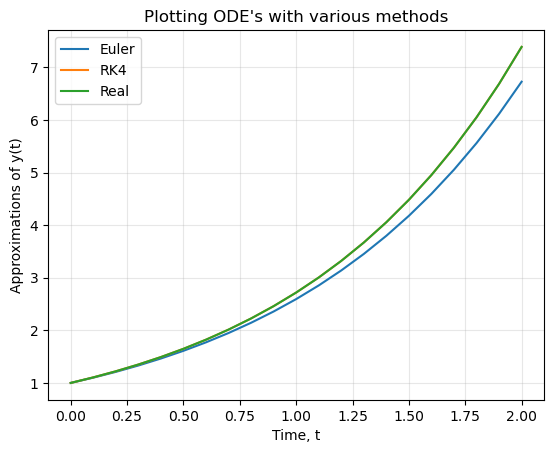

In [93]:
#Driver
Lambda=1
dt=0.1
y0=1
tf=2
[t,y]=solveEuler(Lambda,y0,dt,tf) #calls the Euler function
[t,y1]=solveRK4(Lambda,y0,dt,tf) #calls the RK4 function 

t=np.arange(0,2+dt,dt)
yreal=np.exp(Lambda*t)

plt.figure()
plt.plot(t,y,label="Euler") #plots the Euler function
plt.plot(t,y1,label="RK4") #plots the RK4 function
plt.plot(t,yreal,label="Real") #plots the real function
plt.legend() #creates a legend for the figure
plt.xlabel("Time, t") #creates the label for the x-axis
plt.ylabel("Approximations of y(t)") #creates the label for the y-axis
plt.title("Plotting ODE's with various methods") #creates the title for the figure
plt.grid(alpha=0.3) #produces a grid for the figure with a specific resolution 
plt.show()